In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd

df = pd.read_csv('./data/wine.csv', header=None)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


컬럼 12 = 클래스 정보 : 레드 와인-1, 화이트 와인-0

In [13]:
x = df.iloc[:, 0:12]
y = df.iloc[:, 12]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)


모델 저장

In [14]:
modelpath = "./data/model/all/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

모델 훈련 실행

In [15]:
model = Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25, callbacks=[checkpointer])

Epoch 1/50


2023-10-04 11:55:19.100494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x500x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x500x1x1xi1>'
l

5/8 [=================>............] - ETA: 0s - loss: 0.1309 - accuracy: 0.9540 

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x397x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x397x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformance

8/8 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9536

2023-10-04 11:55:23.578448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x500x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x500x1x1xi1>'
l


Epoch 1: saving model to ./data/model/all/01-0.1165.hdf5
8/8 [==============================] - 7s 579ms/step - loss: 0.1331 - accuracy: 0.9536 - val_loss: 0.1165 - val_accuracy: 0.9569
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1095 - accuracy: 0.9653
Epoch 2: saving model to ./data/model/all/02-0.1046.hdf5
8/8 [==============================] - 0s 19ms/step - loss: 0.1095 - accuracy: 0.9669 - val_loss: 0.1046 - val_accuracy: 0.9677
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1117 - accuracy: 0.9607
Epoch 3: saving model to ./data/model/all/03-0.1059.hdf5
8/8 [==============================] - 0s 18ms/step - loss: 0.1095 - accuracy: 0.9623 - val_loss: 0.1059 - val_accuracy: 0.9692
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1130 - accuracy: 0.9653
Epoch 4: saving model to ./data/model/all/04-0.1061.hdf5
8/8 [==============================] - 0s 18ms/step - loss: 0.1083 - accuracy: 0.9648 - val_loss: 0.1061 - val

In [17]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


35/41 [========================>.....] - ETA: 0s - loss: 0.1269 - accuracy: 0.9500

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'


41/41 [==============================] - 2s 29ms/step - loss: 0.1280 - accuracy: 0.9492
Test accuracy: 0.9492307901382446


히스토리 보기

In [19]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.133128,0.953554,0.116539,0.956923
1,0.109523,0.966898,0.104632,0.967692
2,0.109536,0.962279,0.105947,0.969231
3,0.108307,0.964845,0.106113,0.960769
4,0.105128,0.965871,0.103301,0.970769
5,0.106098,0.965871,0.103498,0.970769
6,0.102438,0.969720,0.102398,0.966923
7,0.101905,0.969207,0.100995,0.966923
8,0.100844,0.969207,0.100383,0.967692
9,0.101719,0.968437,0.098837,0.970000


<Axes: >

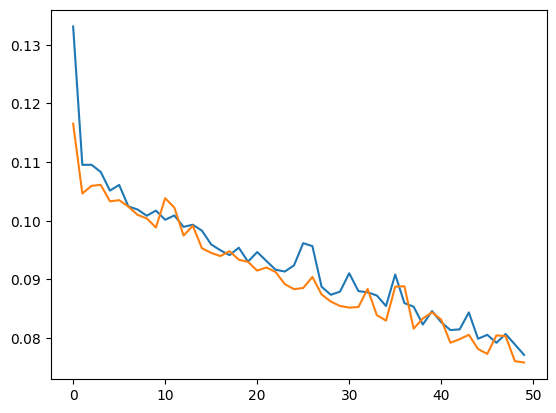

In [25]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()

<Axes: >

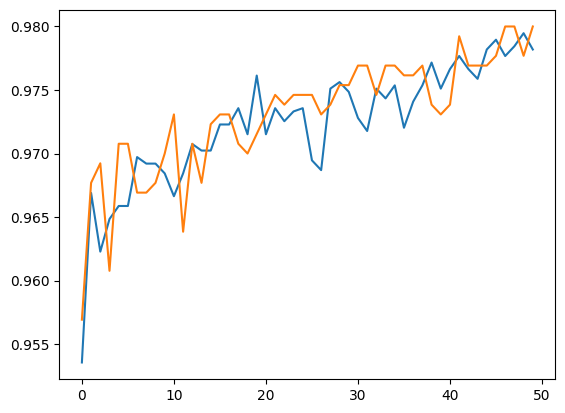

In [26]:
hist_df['accuracy'].plot()
hist_df['val_accuracy'].plot()